In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import warnings
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
stocks=pd.read_csv('data/ALL_DATA.csv')

In [4]:
stocks

,Ticker,Date,Open,High,Low,Close,Volume
0,AB,2022-10-24,24.58,24.58,24.58,24.58,130
1,AB,2022-10-26,23.90,24.58,23.90,23.90,14301
2,AB,2022-10-27,24.58,24.58,24.57,24.58,505
3,AB,2022-10-28,24.58,24.58,24.09,24.58,5882
4,AB,2022-10-31,24.58,24.58,24.57,24.58,1240
...,...,...,...,...,...,...,...
187982,XABYT,2012-04-27,9.04,9.04,8.50,8.90,4618
187983,XABYT,2012-04-30,8.99,9.04,8.73,9.03,480
187984,XABYT,2012-05-02,8.80,9.03,8.76,8.98,4397
187985,XABYT,2012-05-03,8.89,8.90,8.75,8.80,4409


In [5]:
stocks.shape

(187987, 7)

In [6]:
stocks.isnull().sum()

Ticker     0
Date       0
Open      22
High      22
Low       27
Close     22
Volume     0
dtype: int64

In [7]:
stocks.iloc[2335]

Ticker            AB
Date      2013-05-02
Open            33.9
High           34.18
Low             33.9
Close          34.18
Volume          1509
Name: 2335, dtype: object

We could impute the null rows buy hey they are so few, gonna just drop them xD

In [8]:
stocks.dropna(inplace=True)

In [9]:
stocks.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,187960.0,15.342329,31.804541,0.12,3.570000,7.200000,14.48,602.75
High,187960.0,15.439183,31.934965,0.13,3.600000,7.250000,14.52,602.75
Low,187960.0,15.241624,31.673683,0.12,3.513823,7.121073,14.39,602.75
Close,187960.0,15.359806,31.821011,0.12,3.575000,7.200000,14.49,602.75
Volume,187960.0,14545.367302,78249.790732,0.00,430.000000,2342.000000,9152.00,8264824.00


In [10]:
def describe_col(series):
  print('Min:', series['min'],'; Max:',series['max'],'; Mean:',series['mean'], '; Std:', series['std'])

## Question: most traded stock, in terms of volume ? 
Having largest volume sum

In [11]:
volume_sum=stocks.groupby('Ticker')['Volume'].sum().sort_values(ascending=False)

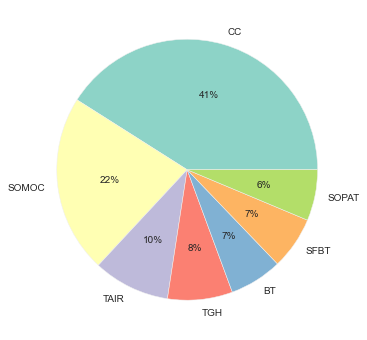

In [12]:
palette_color = sns.color_palette('Set3')
plt.figure(figsize=(8,6))
plt.pie(volume_sum.values[:7],labels=volume_sum.keys()[:7], colors=palette_color, autopct='%.0f%%')
plt.show()

### Stock Market Map
Values are in MTND (Million Tunisian Dinar) <br> For this we'll use squarify library <br> It will get to cluttered so I visualized only the top 40

In [104]:
stocks_cap=pd.read_csv('stocks_valo.csv')
stocks_cap.sort_values(by='Market Cap',ascending=False,inplace=True)

In [124]:
# creating a color map
colors=[plt.cm.Pastel1(i/float(40)) for i in range(40)]

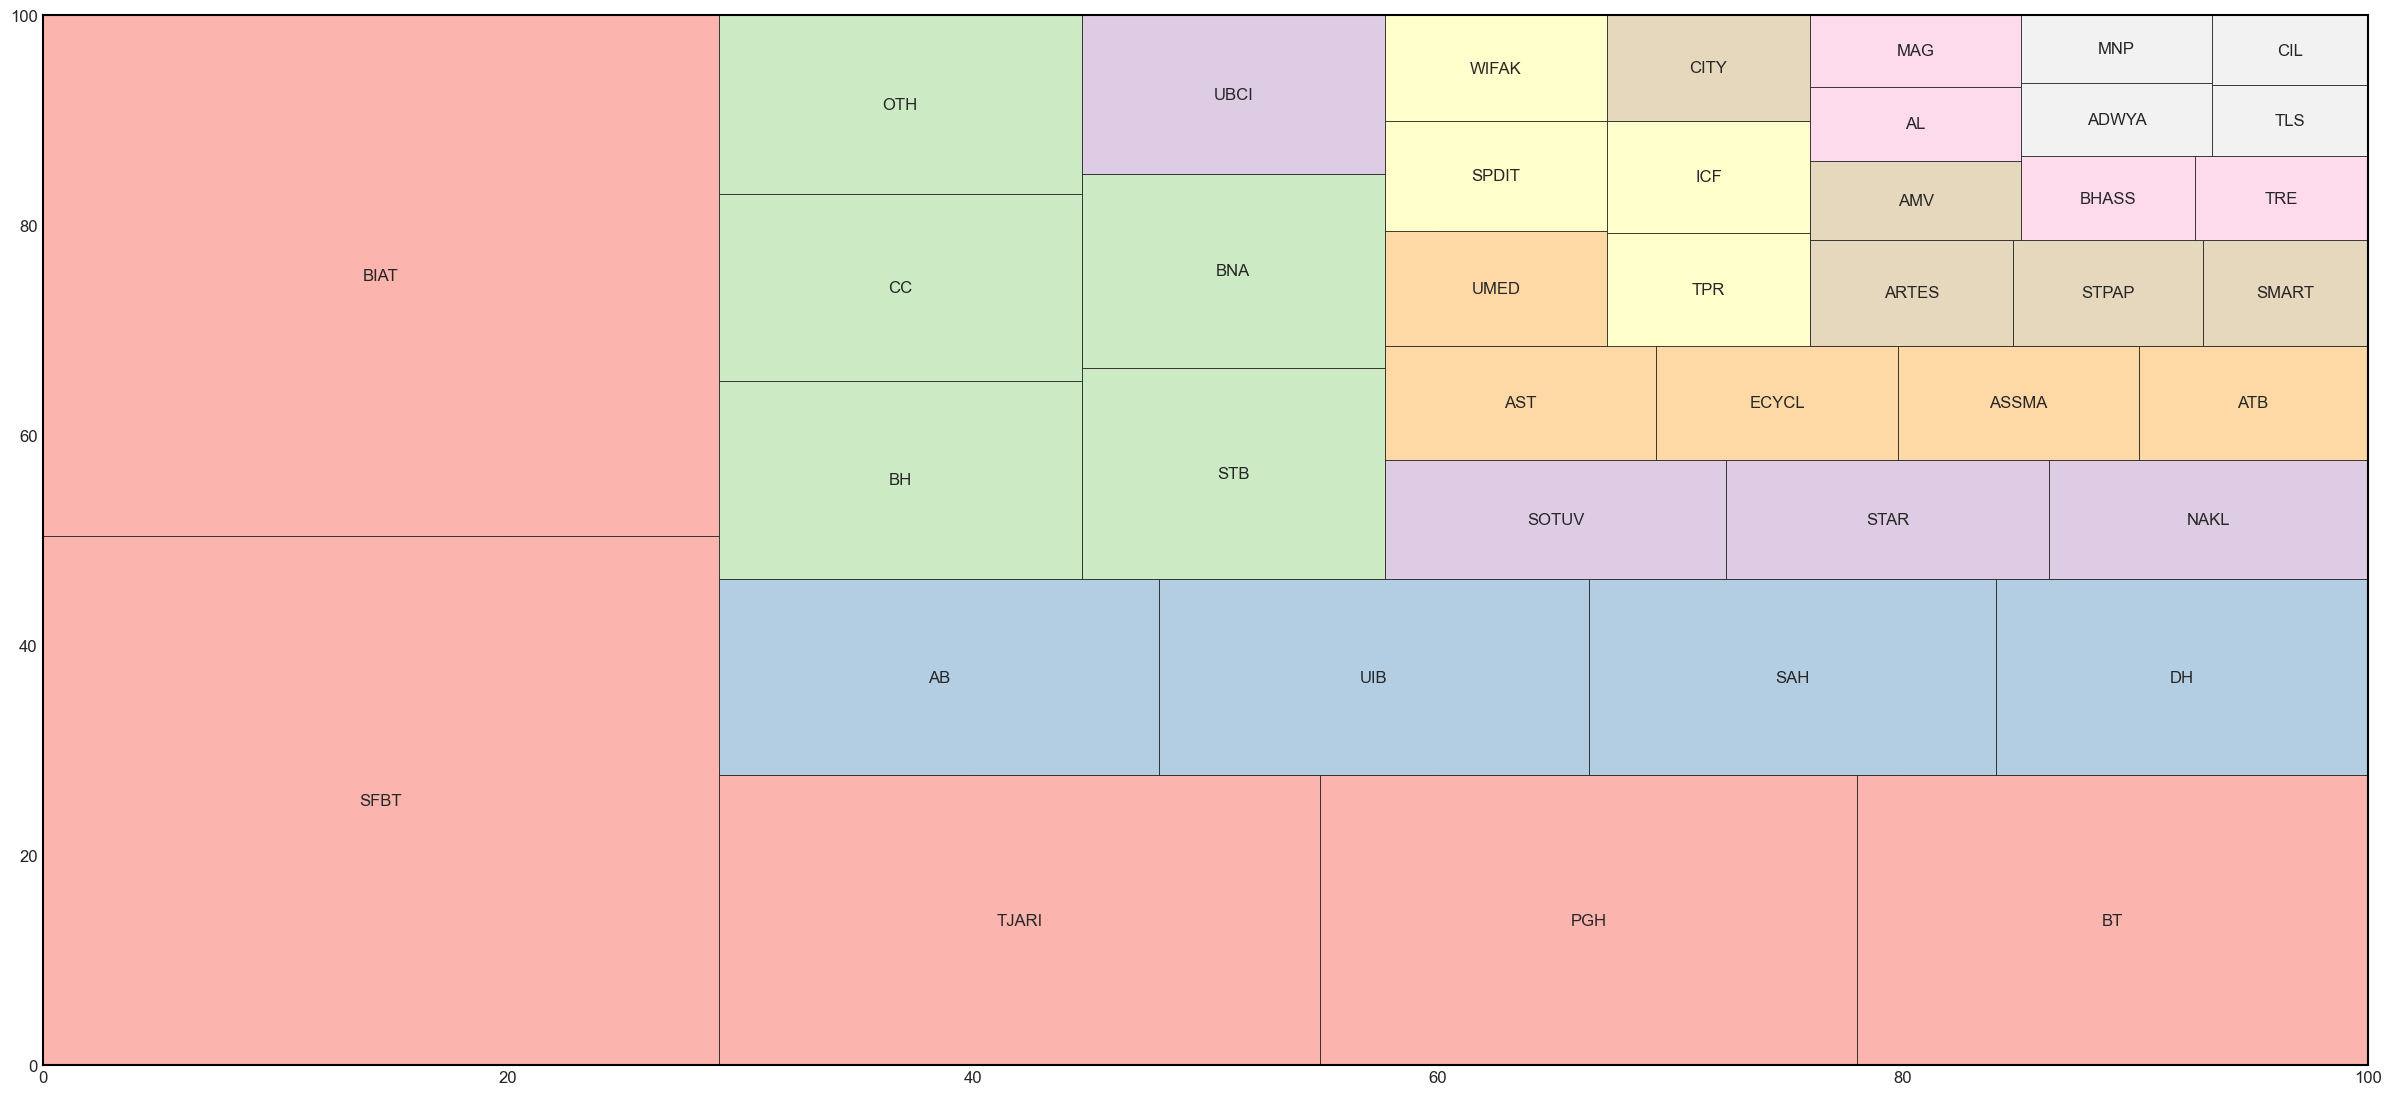

In [125]:
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(2,1,1)

squarify.plot(
  sizes=stocks_cap['Market Cap'][:40],
  label=stocks_cap['Ticker'][:40],
  color=colors,
  bar_kwargs={"linewidth":0.5,"edgecolor":"#111111"},
  ax=ax
)
plt.savefig('figures/market_map.jpg', dpi=300)

In [107]:
stocks_cap[:5]

,Ticker,Market Cap
52,SFBT,3267.0
19,BIAT,3220.0
13,TJARI,1589.0
47,PGH,1422.0
15,BT,1350.0


## Candlestick Chart
This can be done using Matplotlib Finance library
We will try this on  TLNET = Telnet Holding

In [39]:
import mplfinance as mpf
import datetime as dt
tlnet_data=pd.read_csv('data/TLNET.csv')

In [43]:
tlnet_data.index = pd.to_datetime(tlnet_data['Date'], format = '%Y-%m-%d')
tlnet_data.sort_index(inplace=True)

,Ticker,Date,Open,High,Low,Close,Volume
Date,,,,,,,
2020-01-02,TLNET,2020-01-02,9.25,9.25,9.03,9.20,11483
2020-01-03,TLNET,2020-01-03,9.10,9.10,9.00,9.00,7851
2020-01-06,TLNET,2020-01-06,9.00,9.18,8.90,8.94,4992
2020-01-07,TLNET,2020-01-07,8.90,8.90,8.80,8.86,5478
2020-01-08,TLNET,2020-01-08,8.86,8.86,8.80,8.80,3814
...,...,...,...,...,...,...,...
2022-12-26,TLNET,2022-12-26,7.00,7.00,6.95,7.00,396
2022-12-27,TLNET,2022-12-27,7.09,7.09,6.95,7.09,1047
2022-12-28,TLNET,2022-12-28,7.50,7.50,7.07,7.50,19104


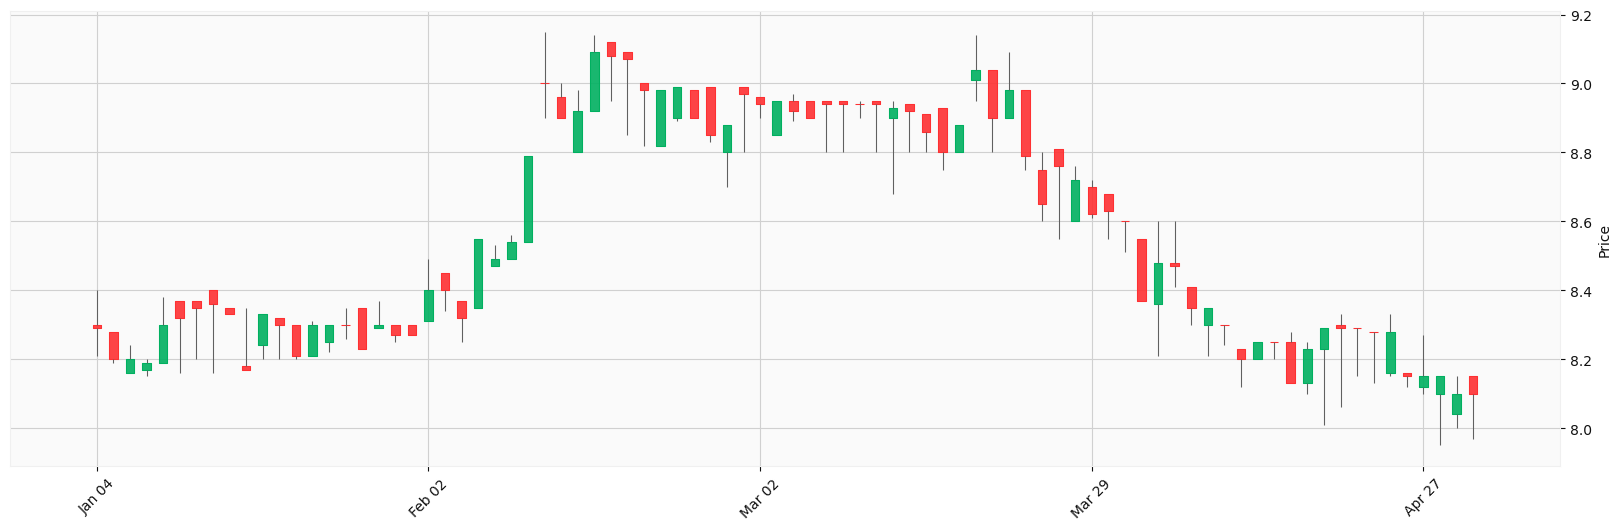

In [76]:
#%matplotlib qt
fig = mpf.figure(figsize=(20, 13), style='yahoo')
ax = fig.add_subplot(2,1,1)
mpf.plot(tlnet_data.loc[(tlnet_data.index>'2021-01-01')&(tlnet_data.index<'2021-05-01')], type='candle', style='yahoo', ax=ax)
plt.savefig('figures/telnet_candlestick_chart.jpg', dpi=300)

Telnet challenge one satellite was launched on 22 march 2021 we can clearly see how that impacted stock

# We'll Analyse Individual Stocks

## **Questions:**
1. When did they do an IPO?
2. What was the change in price over time?
3. What was the moving average?
4. Daily return of different stocks?
5. What was the correlation between different stocks?
6. How much value do we put at risk by investing in a particular stock?

### 1) When did Delice and Land'or do an IPO?
* DH = Delice Holding
* LNDOR = LAND'OR

In [13]:
dh_data=pd.read_csv('data/DH.csv')
lndor_data=pd.read_csv('data/LNDOR.csv')

In [14]:
dh_data.index = pd.to_datetime(dh_data.index, format = '%Y-%m-%d')

In [15]:
print("First Delice trade:",dh_data['Date'].min())
print("First Land'or trade:",lndor_data['Date'].min())

First Delice trade: 2014-10-14
First Land'or trade: 2013-03-05


### 2) What was the change in price over time?
**BIAT vs Attijari**

In [16]:
biat_data=pd.read_csv('data/BIAT.csv')
tjari_data=pd.read_csv('data/TJARI.csv')

**Closing Price:**

In [17]:
biat_data.set_index('Date',inplace=True)
tjari_data.set_index('Date',inplace=True)

In [18]:
tjari_data.sort_index(inplace=True)
biat_data.sort_index(inplace=True)

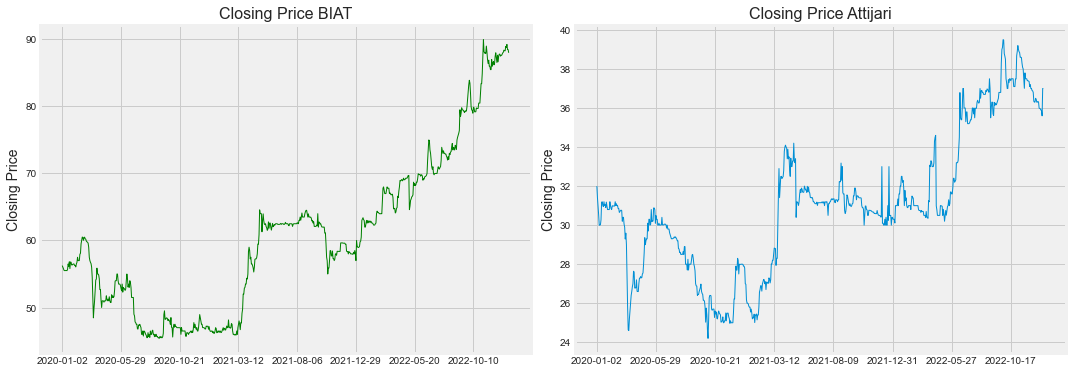

In [19]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
biat_data[biat_data.index>'2020-01-01']['Close'].plot(color='green', linewidth=1)
plt.ylabel('Closing Price', size=14)
plt.xlabel(None)
plt.title(f"Closing Price BIAT", size=16)
plt.subplot(2, 2, 2)
tjari_data[tjari_data.index>'2020-01-01']['Close'].plot(linewidth=1)
plt.ylabel('Closing Price', size=14)
plt.xlabel(None)
plt.title(f"Closing Price Attijari", size=16)
    
plt.tight_layout()
plt.savefig('figures/closing_price_biat_tjari.jpg', dpi=300)

**Volume of Sales:**

Min: 2.0 ; Max: 3372356.0 ; Mean: 5877.113178294574 ; Std: 60606.64060051649


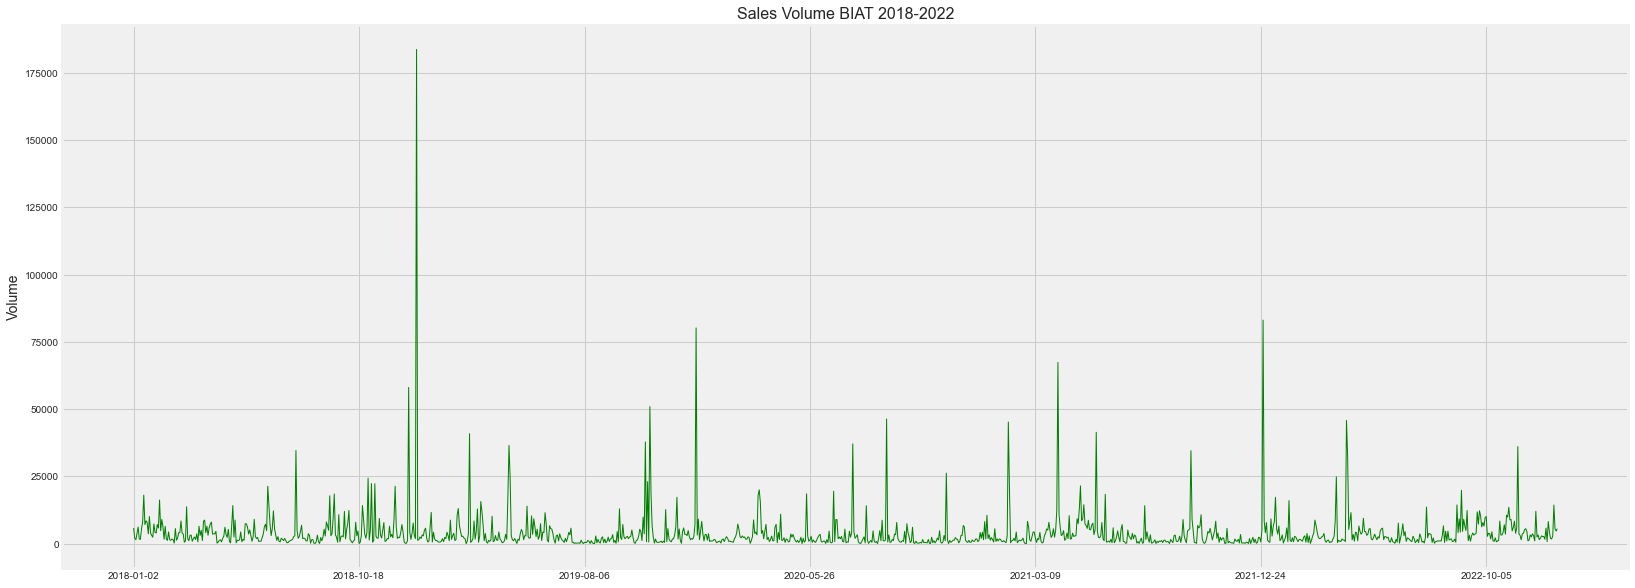

In [21]:
plt.figure(figsize=(25, 10))

biat_data[biat_data.index>'2018-01-01']['Volume'].plot(color='green', linewidth=1)
plt.ylabel('Volume', size=14)
plt.xlabel(None)
plt.title(f"Sales Volume BIAT 2018-2022", size=16)
plt.savefig('figures/sales_volume_biat.jpg', dpi=300)
describe_col(biat_data['Volume'].describe())

Min: 1.0 ; Max: 979908.0 ; Mean: 6902.384355828221 ; Std: 25587.119150802693


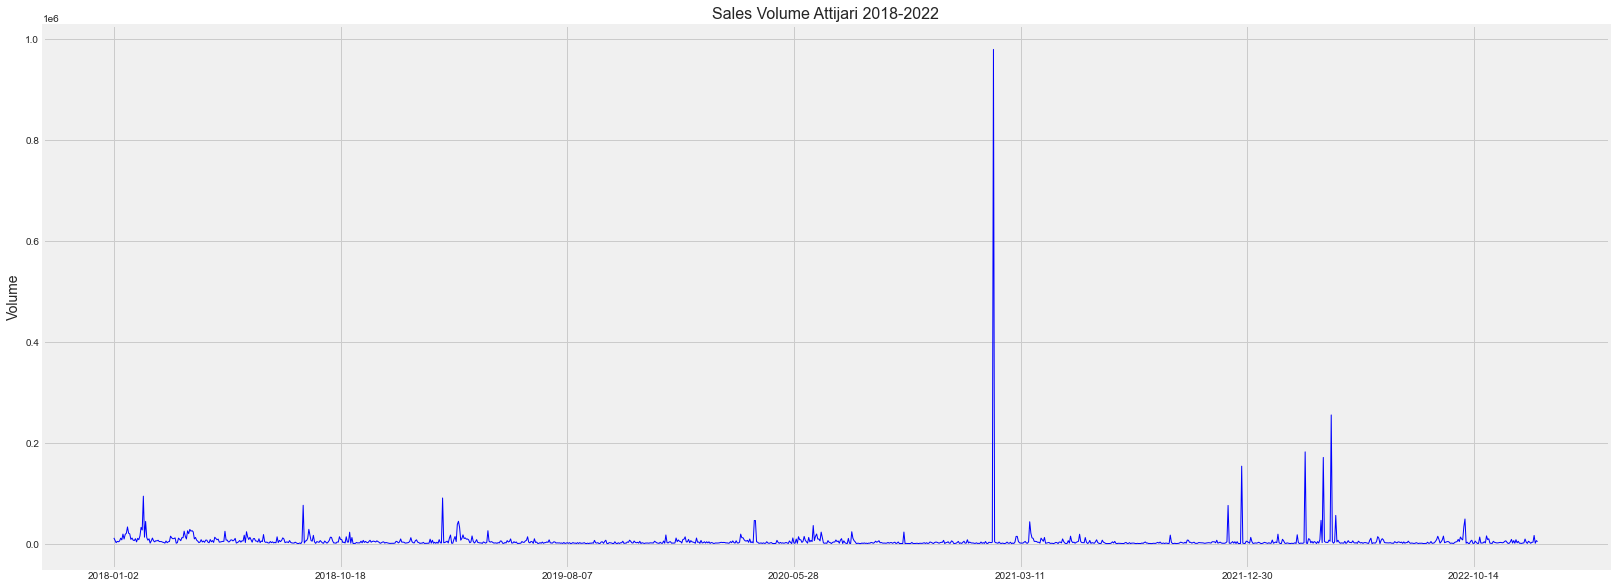

In [22]:
plt.figure(figsize=(25, 10))

tjari_data[tjari_data.index>'2018-01-01']['Volume'].plot(color='blue', linewidth=1)
plt.ylabel('Volume', size=14)
plt.xlabel(None)
plt.title(f"Sales Volume Attijari 2018-2022", size=16)
plt.savefig('figures/sales_volume_tjari.jpg', dpi=300)
describe_col(tjari_data['Volume'].describe())

### 3) What was the moving average?
We will use Telnet because we know it was volatile, most other stocks are slow moving.<br>
Demonstrates the popular and basic moving average crossover algorithmic trading strategy.

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.


In [128]:
tlnet_data=pd.read_csv('data/TLNET.csv')
tlnet_data.index = pd.to_datetime(tlnet_data['Date'], format = '%Y-%m-%d')
tlnet_data.sort_index(inplace=True)

In [127]:
# choosing time frames
ma_1=30
ma_2=80

In [132]:
tlnet=tlnet_data[tlnet_data.index>'2020-01-01']

In [135]:
tlnet[f'MA_{ma_1}']=tlnet['Close'].rolling(window=ma_1).mean()
tlnet[f'MA_{ma_2}']=tlnet['Close'].rolling(window=ma_2).mean()

In [139]:
# first rows will be obvisouly NaN
# delete first ma_2 rows since ma_2>ma_1
tlnet=tlnet.iloc[ma_2:]

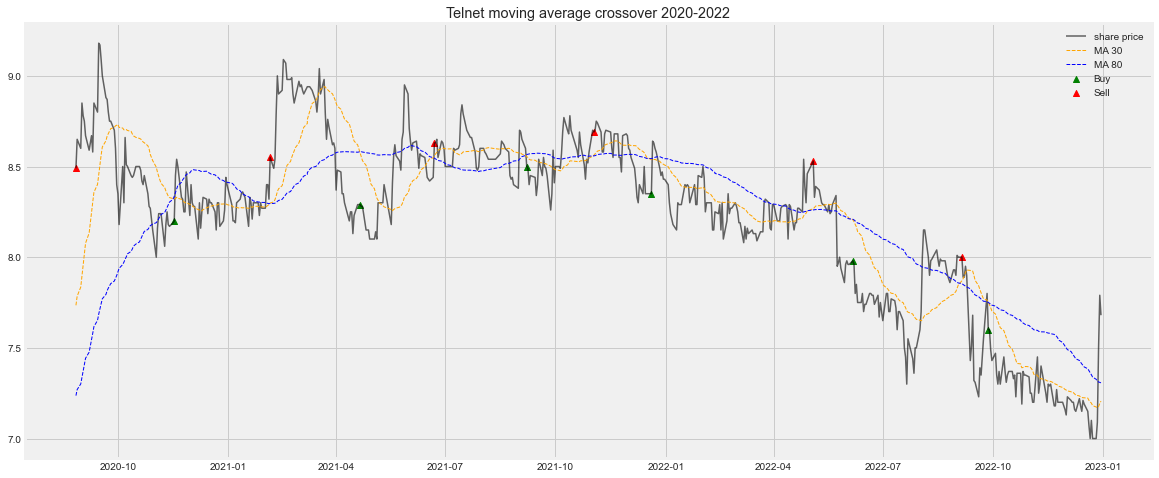

In [151]:

buy_signals=[]
sell_signals=[]
trigger=0

for x in range(len(tlnet)):    
    if tlnet[[f'MA_{ma_1}']].iloc[x].values <= tlnet[[f'MA_{ma_2}']].iloc[x].values and trigger!=1:
        buy_signals.append(tlnet['Close'].iloc[x])
        sell_signals.append(float('nan'))
        trigger=1 
    elif tlnet[[f'MA_{ma_1}']].iloc[x].values >= tlnet[[f'MA_{ma_2}']].iloc[x].values and trigger!=-1:
        sell_signals.append(tlnet['Close'].iloc[x])
        buy_signals.append(float('nan'))
        trigger=-1
    else:
        buy_signals.append(float('nan'))
        sell_signals.append(float('nan'))
tlnet['Buy Signals']=buy_signals
tlnet['Sell Signals']=sell_signals

plt.figure(figsize=(18,8))
plt.plot(tlnet['Close'], label='share price', alpha=0.6, color='black', linewidth=1.5)
plt.plot(tlnet[f'MA_{ma_1}'], label=f'MA {ma_1}' ,color='orange', linestyle='--',linewidth=1)
plt.plot(tlnet[f'MA_{ma_2}'], label=f'MA {ma_2}' ,color='blue',  linestyle='--',linewidth=1)
plt.scatter(tlnet.index, tlnet['Buy Signals'], label='Buy', marker='^', color='green', lw=1)
plt.scatter(tlnet.index, tlnet['Sell Signals'], label='Sell', marker='^', color='red', lw=1)
plt.legend(loc='upper right')
plt.title('Telnet moving average crossover 2020-2022')
plt.savefig('figures/moving_average_crossover.jpg', dpi=300)

### 4) Daily return of different stocks?
Risk analysis

In [38]:
creal_data=pd.read_csv('data/CREAL.csv')
biat_data=pd.read_csv('data/BIAT.csv')

In [39]:
creal_data.index = pd.to_datetime(creal_data['Date'], format = '%Y-%m-%d')
creal_data.sort_index(inplace=True)

In [40]:
creal_data['Daily Return'] = creal_data['Close'].pct_change()

In [32]:
creal_data.dropna(inplace=True)

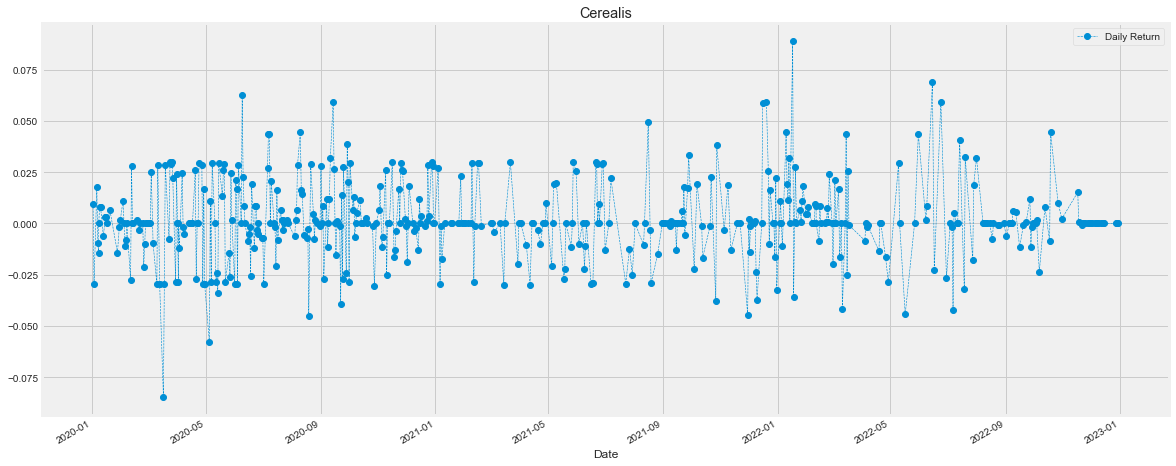

In [33]:
plt.figure(figsize=(18,8))
creal_data[creal_data.index>'2020-01-01']['Daily Return'].plot(legend=True, linestyle='--', marker='o', linewidth=0.6)
plt.title('Cerealis')
plt.savefig('figures/cerealis_daily_return.jpg', dpi=300)